# Assignment 3



# Maxon Yin my2883





# Exercises







We will start by redoing the dataset construction of Assignment 2. ( Feel free to use your previous code!)

Start by importing pandas, numpy, maplotlib, and loading the data set.

The dataset has address

`url='https://github.com/amoreira2/Fin418/raw/refs/heads/main/assets/data/Retuns50stocks.xlsx'`

I strongly recommend you download first and look at the data set.

You should use `read_excel` to get the data that contains t0 stocks plus the market

See here:https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html .

Do the followings:

1. Import this dataframe as `df`
    - Use "skip_rows" to skip the initial rows before the data.
    - Figure out what is the code for missing value and change the option `na_values` appropriately


2. Change the name of the column with the date information to "Date"

3. Use `to_datetime` so python understand the column date as a datetime object (you will have to use the option format)

4. Set date as index

5. convert the date from the start of the month to end of the month.

6. Drop any date with a missing observations (it will be just one date)

7. Find the market in the columns and save the stocks in a data frame (df) and the market in a different data frame called df_market

In [17]:
# your code below
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

url='https://github.com/amoreira2/Fin418/raw/refs/heads/main/assets/data/Retuns50stocks.xlsx'

candidate_na = [-99.99, -999, -999.0, -99, 'NA', 'NaN', 'nan']

df = pd.read_excel(
    url,
    skiprows=0,
    na_values=candidate_na
)

print("Columns after initial read:", list(df.columns))

date_candidates = [c for c in df.columns if 'date' in str(c).lower()]
if len(date_candidates) == 0:
    date_col = df.columns[0]
else:
    date_col = date_candidates[0]

df = df.rename(columns={date_col: 'Date'})

try:
    df['Date'] = pd.to_datetime(df['Date'].astype(str), format='%Y%m')
except Exception:
    df['Date'] = pd.to_datetime(df['Date'])

df = df.set_index('Date').sort_index()

df.index = df.index.to_period('M').to_timestamp('M')

print("Shape before dropna:", df.shape)
df = df.dropna(how='any')
print("Shape after dropna:", df.shape)

market_col = 'Market'

df_market = df[[market_col]].rename(columns={market_col: 'Market'})
df = df.drop(columns=[market_col])

print("Stocks df shape:", df.shape)
print("Market df shape:", df_market.shape)
print("Index is month-end only? ->", pd.Series(df.index).dt.is_month_end.all())
print("Stocks head:\n", df.head())
print("Market head:\n", df_market.head())

Columns after initial read: ['date', 'CTL', 'T', 'CSCO', 'FCX', 'XL', 'IVZ', 'AMT', 'WHR', 'IR', 'WFT', 'YUM', 'CVS', 'GD', 'TYC', 'EL', 'MUR', 'CTAS', 'CBSA', 'SNV', 'CAM', 'DLTR', 'CAH', 'DTE', 'SSP', 'PSA', 'EXC', 'TKR', 'CMA', 'ORCL', 'MS', 'RSG', 'ACAS', 'AGN', 'MMM', 'ETFC', 'CAR', 'MDR', 'NOV', 'PCH', 'BAX', 'JCI', 'SWK', 'DVN', 'TMO', 'PEP', 'LNC', 'EMR', 'MLM', 'CCI', 'NU', 'Market']
Shape before dropna: (180, 51)
Shape after dropna: (180, 51)
Stocks df shape: (180, 50)
Market df shape: (180, 1)
Index is month-end only? -> True
Stocks head:
                 CTL        T     CSCO      FCX       XL      IVZ      AMT  \
Date                                                                        
2000-01-31 -18.4697 -11.5513   2.2170 -17.4556 -12.5301  -4.0929  17.3824   
2000-02-29 -12.9450 -11.2245  20.7192 -21.1470  -9.8898   5.3057  37.2822   
2000-03-31  10.5502  10.6732  16.9740 -12.2727  36.9397  24.4250   0.2538   
2000-04-30 -34.0067   4.6083 -10.3274 -20.2073 -13.9955   

**Exercise 1. Portfolio Moments**

Construct a portfolio that equal weights the first five stocks. Compute this portfolio variance in this sample.  



In [18]:
# your code below
stocks5 = df.iloc[:, :5].copy()

w = np.full(5, 1/5)

Sigma = stocks5.cov(ddof=1)
var_port_cov = float(w.T @ Sigma.values @ w)

print("Portfolio variance: ", var_port_cov)

Portfolio variance:  45.596248764001416


**Exercise 2. Annualize it**

Report this number in yearly units



In [19]:
monthly_var = var_port_cov
annualized_var = monthly_var * 12
print("Annualized variance: ", annualized_var)

Annualized variance:  547.154985168017


**Exercise 3. Function 1**


Construct a function that takes as input the number of stocks in the portfolio, lets call that parameter N, and outputs the (yearly) variance of the portfolio that equal weight the first N stocks

In [20]:
# your code below
def portfolio_variance(df, N):
  stocksN = df.iloc[:, :N].dropna(how='any')
  w = np.full(N, 1/N)

  Sigma = stocksN.cov(ddof=1)

  var_monthly = float(w.T @ Sigma.values @ w)

  var_annual = var_monthly * 12

  return var_annual

var5 = portfolio_variance(df, 5)
print("Annualized variance for first 5 stocks:", var5)



Annualized variance for first 5 stocks: 547.154985168017


**Exercise 4. Function 2**


Construct a function that takes as input the number of stocks in the portfolio and also, lets call that parameter N, and outputs the (yearly) variance of the portfolio that equal weight N randomly picked stocks

In [21]:
# your code below
def portfolio_variance_random(df, N, seed=None):

   selected = np.random.choice(df.columns, size=N, replace=False)
   stocksN = df[selected].dropna(how='any')

   w = np.full(N, 1/N)

   Sigma = stocksN.cov(ddof=1)

   var_monthly = float(w.T @ Sigma.values @ w)

   var_annual = var_monthly * 12

   return var_annual, list(selected)

var5, chosen5 = portfolio_variance_random(df, 5, seed=42)
print("Annualized variance (random 5 stocks):", var5)
print("Chosen stocks:", chosen5)

Annualized variance (random 5 stocks): 502.15114886019603
Chosen stocks: ['MS', 'DLTR', 'GD', 'EMR', 'SSP']


**Exercise 5. A simulation**


Construct a function that that takes as an input the number of stocks N and then use the function above (excercise 4) to simulate 100 different portfolios and output the average of these 100 portfolios

In [22]:
# your code below
def simulate_portfolio_variance(df, N, num_sim=100):
  vars_list = []

  for _ in range(num_sim):
      var_annual, _ = portfolio_variance_random(df, N)  # 调用 Exercise 4 的函数
      vars_list.append(var_annual)

  avg_var = np.mean(vars_list)

  return avg_var, vars_list

avg_var5, all_vars5 = simulate_portfolio_variance(df, 5, num_sim=100)
print("Average annualized variance (100 random 5-stock portfolios):", avg_var5)


Average annualized variance (100 random 5-stock portfolios): 579.9700838923278


**Exercise 6. A plot**


Call the function above for N=1 to N=50 and plot the variance as function of N

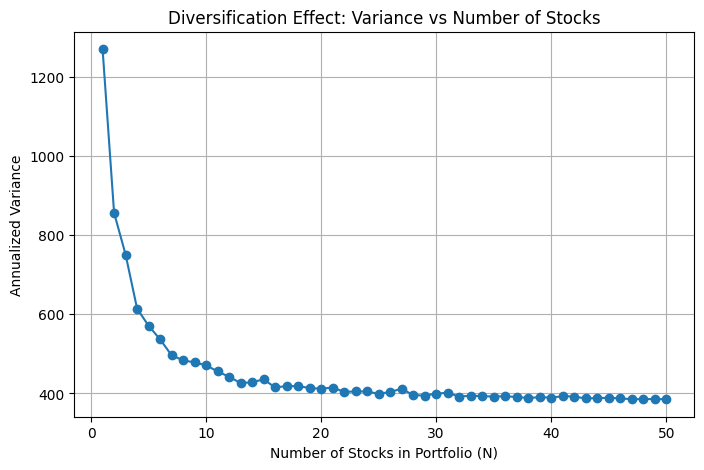

In [23]:
# your code below
N_range = range(1, 51)
avg_vars = []

for N in N_range:
    avg_var, _ = simulate_portfolio_variance(df, N, num_sim=100)
    avg_vars.append(avg_var)

plt.figure(figsize=(8,5))
plt.plot(N_range, avg_vars, marker='o')
plt.xlabel("Number of Stocks in Portfolio (N)")
plt.ylabel("Annualized Variance")
plt.title("Diversification Effect: Variance vs Number of Stocks")
plt.grid(True)
plt.show()


**Exercise 7. the market**


Add the market variance to the plot as an horizontal line to the plot you made above

Market annualized variance: 254.90037959357852


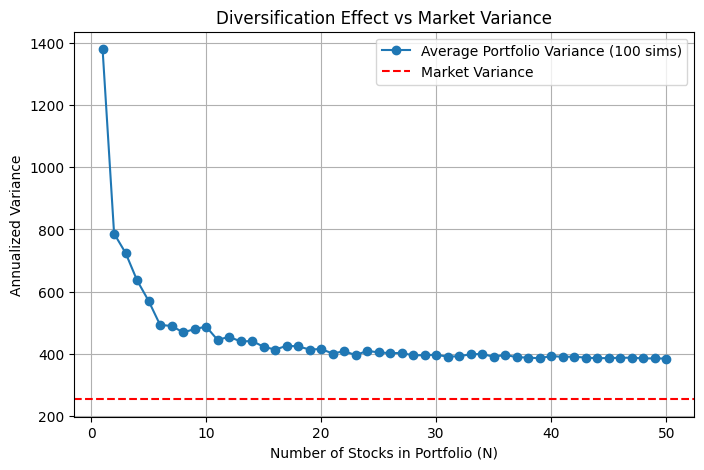

In [24]:
# your code below
market_var_monthly = df_market['Market'].var(ddof=1)
market_var_annual = market_var_monthly * 12

print("Market annualized variance:", market_var_annual)

N_range = range(1, 51)
avg_vars = []

for N in N_range:
    avg_var, _ = simulate_portfolio_variance(df, N, num_sim=100)
    avg_vars.append(avg_var)

plt.figure(figsize=(8,5))
plt.plot(N_range, avg_vars, marker='o', label="Average Portfolio Variance (100 sims)")
plt.axhline(y=market_var_annual, color='red', linestyle='--', label="Market Variance")

plt.xlabel("Number of Stocks in Portfolio (N)")
plt.ylabel("Annualized Variance")
plt.title("Diversification Effect vs Market Variance")
plt.legend()
plt.grid(True)
plt.show()

**Exercise 8. Interpretation**


Explain what you see in the plot. Try to articulate what you think is happening

#The plot shows that portfolio variance falls as more stocks are added. With only one stock, variance is high because it includes firm-specific risk. As the number of stocks increases, diversification reduces this idiosyncratic risk, so variance declines quickly at first. However, the curve flattens and approaches the market variance line, showing that systematic risk cannot be diversified away. In other words, adding more stocks helps, but only up to the market risk level.your answer here

**Exercise 9. A decomposition**


We now want to build a function that outputs only the terms due to the variance terms

That is, instead of computing $Var(WR)=W@Var(R)@W=\sum_i\sum_jW_iW_jCov(R_i,R_j)$ which gives you the variance of a portfolio with weight W,


I want you do compute $\sum_iW_i^2Var(R_i)$, this component of the portfolio variance that comes only from the variance terms

Then subtract this term from the total variance term


Show the three lines in a plot as functions of N (1. the total variance (and also the market like in exercise 7), 2. the component coming only from the variance terms, and 3. the residual (the component due to the covariance terms) )



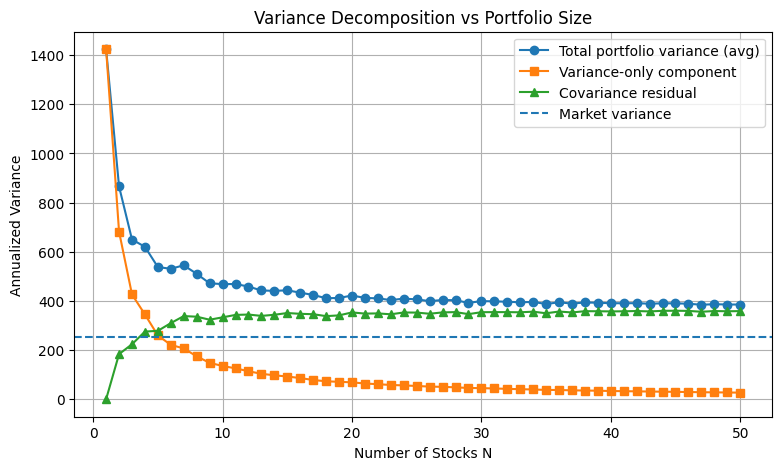

In [25]:
# your code below
def decompose_portfolio_variance_random(df, N, num_sim=100):

    tot_list, var_only_list, cov_resid_list = [], [], []

    for _ in range(num_sim):
        cols = np.random.choice(df.columns, size=N, replace=False)
        block = df[cols].dropna(how='any')

        w = np.full(N, 1.0/N)

        Sigma = block.cov(ddof=1).values

        total_var_m     = float(w @ Sigma @ w)
        var_only_m      = float(w @ np.diag(np.diag(Sigma)) @ w)
        cov_residual_m  = total_var_m - var_only_m

        tot_list.append(total_var_m * 12)
        var_only_list.append(var_only_m * 12)
        cov_resid_list.append(cov_residual_m * 12)

    return (
        np.mean(tot_list),
        np.mean(var_only_list),
        np.mean(cov_resid_list),
    )

N_range = range(1, 51)
avg_total, avg_var_only, avg_cov_resid = [], [], []

for N in N_range:
    t, v, c = decompose_portfolio_variance_random(df, N, num_sim=100)
    avg_total.append(t)
    avg_var_only.append(v)
    avg_cov_resid.append(c)

market_var_annual = df_market['Market'].var(ddof=1) * 12

plt.figure(figsize=(9,5))
plt.plot(N_range, avg_total, marker='o', label='Total portfolio variance (avg)')
plt.plot(N_range, avg_var_only, marker='s', label='Variance-only component')
plt.plot(N_range, avg_cov_resid, marker='^', label='Covariance residual')
plt.axhline(y=market_var_annual, linestyle='--', label='Market variance')

plt.xlabel('Number of Stocks N')
plt.ylabel('Annualized Variance')
plt.title('Variance Decomposition vs Portfolio Size')
plt.legend()
plt.grid(True)
plt.show()



**Exercise 10. Interpretation 2**


looking at this new plot, what do you learn? What does that imply about portfolio construction?


#The decomposition plot shows total variance falls as N grows but quickly flattens. The variance‐only piece shrinks roughly like 1/N (idiosyncratic risk diversifies), while the covariance residual stabilizes near the market line—evidence of positive average correlations that you cannot diversify away.

**Exercise 11. Factor betas**

Randomly select 10 stocks from `df` and draw a figure that plots the returns of these industries along with the market return.

Just by looking, which seems seems to have the highest beta?

Why is it important to measure beta correctly? i.e. explain how you can use beta to improve a trade that you have in one of these companies

Betas (highest to lowest):
LNC     1.826397
IR      1.461150
NOV     1.398243
CAM     1.287322
ORCL    1.269003
MUR     0.873364
MLM     0.871716
CTL     0.726946
AGN     0.569430
RSG     0.495615
dtype: float64

Highest-beta (measured): LNC -> 1.826397102286578


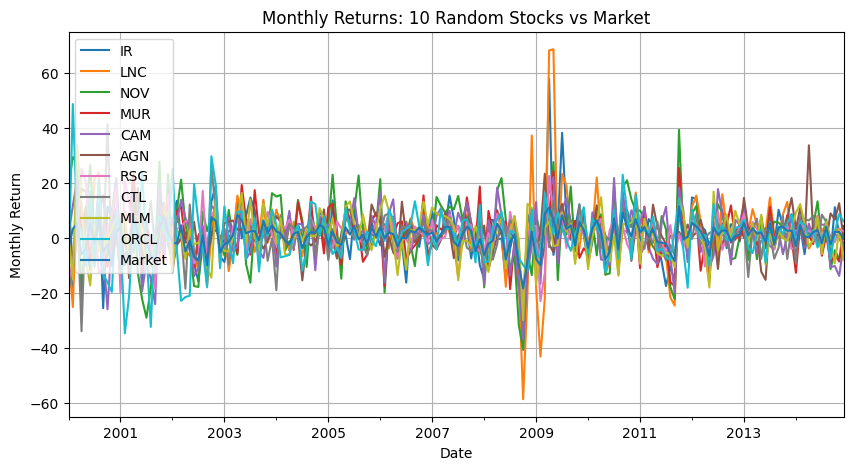

In [26]:
# Your code below
chosen = np.random.choice(df.columns, size=10, replace=False)
ret10 = df[chosen].dropna(how='any')
mkt = df_market['Market'].reindex(ret10.index)

to_plot = ret10.copy()
to_plot['Market'] = mkt

ax = to_plot.plot(figsize=(10,5), title="Monthly Returns: 10 Random Stocks vs Market")
ax.set_xlabel("Date")
ax.set_ylabel("Monthly Return")
ax.grid(True)
plt.tight_layout()
plt.show()

common_idx = ret10.index.intersection(mkt.dropna().index)
R = ret10.loc[common_idx]
Rm = mkt.loc[common_idx]

market_var = Rm.var(ddof=1)
betas = {}
for col in R.columns:
    cov_im = np.cov(R[col], Rm, ddof=1)[0,1]
    betas[col] = cov_im / market_var

betas = pd.Series(betas).sort_values(ascending=False)
print("Betas (highest to lowest):")
print(betas)
print("\nHighest-beta (measured):", betas.index[0], "->", betas.iloc[0])

#The plot of 10 random stocks with the market shows that some stocks move more strongly in the same direction as the market, suggesting higher betas. The stock with the largest swings relative to the market likely has the highest beta. Measuring beta correctly is crucial because it tells us how sensitive a stock is to market movements. With accurate beta, traders can size positions, hedge market exposure, or build market‐neutral strategies to focus on capturing true alpha.Your answer here

**Exercise 12. Factor betas 2**

Run regressions of all stocks in `df` on the market return you saved in `df_market`. Include intercepts in the regressions.

Just follow the code below to run regressions.

The coefficients to the market return are the betas to each industry.

Now suppose you are a fund manager and you have a mandate to keep your beta equal to 0.5.

Provide portfolio weights based on the regressions above to hit the mandate beta.

Give at least *five* such portfolios that satisfy that restriction. At least one of these portfolios has to play in more than one stock at a time.

In [27]:
import statsmodels.api as sm

X = df_market['Market']
X = sm.add_constant(X)  # Adds a constant term to the predictor
y = df.iloc[:, 0]
model = sm.OLS(y, X).fit(dropna=True)
print(model.summary())

# Your code below

results = []

Rm = df_market['Market']

for col in df.columns:
    y = df[col].dropna()
    X = Rm.reindex(y.index)
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    alpha = model.params['const']
    beta  = model.params['Market']
    t_alpha = model.tvalues['const']
    t_beta  = model.tvalues['Market']
    r2 = model.rsquared

    results.append({
        'ticker': col,
        'alpha': alpha,
        'beta': beta,
        't_alpha': t_alpha,
        't_beta': t_beta,
        'R2': r2,
        'nobs': int(model.nobs)
    })

betas_df = pd.DataFrame(results).set_index('ticker').sort_values('beta')
print("Head of regression results:\n", betas_df.head())
print("Tail of regression results:\n", betas_df.tail())

target_beta = 0.5
b = betas_df['beta'].copy()

def portfolio_beta(weights_dict, betas_series):
    return sum(w * betas_series[t] for t, w in weights_dict.items() if t != 'CASH')  # CASH beta=0

# (A)
# 1)
above = b[b >= target_beta]
i1 = above.index[0] if len(above) else b.idxmax()
w_stock = target_beta / b[i1]
w_cash  = 1 - w_stock
port1 = {i1: w_stock, 'CASH': w_cash}
print("\nPortfolio 1 (single + cash):", port1, " -> beta≈", portfolio_beta(port1, b))

# 2)
i2 = b.idxmax()
w_stock = target_beta / b[i2]
w_cash  = 1 - w_stock
port2 = {i2: w_stock, 'CASH': w_cash}
print("Portfolio 2 (max-beta + cash):", port2, " -> beta≈", portfolio_beta(port2, b))

# 3)
below = b[b < target_beta]
i3 = below.index[-1] if len(below) else b.idxmin()
w_stock = target_beta / b[i3]
w_cash  = 1 - w_stock
port3 = {i3: w_stock, 'CASH': w_cash}
print("Portfolio 3 (low-beta + cash, may lever):", port3, " -> beta≈", portfolio_beta(port3, b))

# (B)
# 4)
if len(below) >= 1 and len(above) >= 1:
    iL = below.index[0]
    iH = above.index[0]
else:
    iL, iH = b.idxmin(), b.idxmax()

wH = (target_beta - b[iL]) / (b[iH] - b[iL])
wL = 1 - wH

wH = min(max(wH, 0.0), 1.0)
wL = 1 - wH
port4 = {iL: wL, iH: wH}
print("Portfolio 4 (two-stock long-only):", port4, " -> beta≈", portfolio_beta(port4, b))

# (C)
# 5)
if len(below) >= 2:
    iL1, iL2 = below.index[:2]
else:
    iL1, iL2 = (b.nsmallest(2).index[0], b.nsmallest(2).index[1])
iH2 = b.idxmax()

wL1, wL2, wH2 = 0.3, 0.3, 0.4
beta_now = wL1*b[iL1] + wL2*b[iL2] + wH2*b[iH2]

delta = target_beta - beta_now

wH2_adj = wH2 + delta / b[iH2]
wL2_adj = wL2 - delta / b[iH2]
wL1_adj = wL1

weights = np.array([wL1_adj, wL2_adj, wH2_adj])
weights = np.clip(weights, 0, None)
weights = weights / weights.sum()

port5 = {iL1: weights[0], iL2: weights[1], iH2: weights[2]}
beta5 = portfolio_beta(port5, b)
print("Portfolio 5 (three-stock long-only):", port5, " -> beta≈", beta5)


                            OLS Regression Results                            
Dep. Variable:                    CTL   R-squared:                       0.171
Model:                            OLS   Adj. R-squared:                  0.167
Method:                 Least Squares   F-statistic:                     36.81
Date:                Sun, 28 Sep 2025   Prob (F-statistic):           7.62e-09
Time:                        20:42:43   Log-Likelihood:                -614.37
No. Observations:                 180   AIC:                             1233.
Df Residuals:                     178   BIC:                             1239.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1885      0.554      0.340      0.7

**Exercise 13. Factor risk**

Find beta-hedged portfolio returns using the five mandate portfolios you provided in Exercise 12.

Draw a plot drawing these portfolio returns together.(i.e. spy in the x-axis, hedge portfolio in the y)

Do they show any co-movement?  Can you say they are all "risk free"? In what sense they are free of risk and what sense they are not?

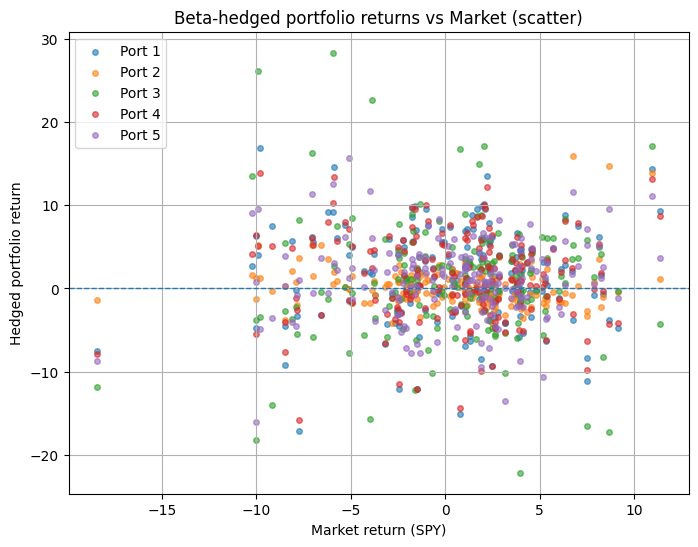

In [28]:
# Your code below

def port_return_series(weights, df_stocks):
    """Compute portfolio return series from weight dict; CASH assumed 0 return."""
    s = pd.Series(0.0, index=df_stocks.index)
    for k, w in weights.items():
        if k == 'CASH':
            continue
        s = s.add(w * df_stocks[k], fill_value=0.0)
    return s

def ensure_ex12_portfolios(df, df_market):
    """(Re)build five portfolios with target beta=0.5 if not already defined."""
    Rm = df_market['Market']
    rows = []
    for col in df.columns:
        y = df[col]
        X = sm.add_constant(Rm)
        model = sm.OLS(y, X).fit(dropna=True)
        rows.append({'ticker': col, 'beta': model.params['Market']})
    b = pd.DataFrame(rows).set_index('ticker')['beta'].sort_values()
    target = 0.5

    above = b[b >= target]
    i1 = above.index[0] if len(above) else b.idxmax()
    w1 = target / b[i1]
    port1 = {i1: w1, 'CASH': 1 - w1}

    i2 = b.idxmax()
    w2 = target / b[i2]
    port2 = {i2: w2, 'CASH': 1 - w2}

    i3 = b.idxmin()
    w3 = target / b[i3]
    port3 = {i3: w3, 'CASH': 1 - w3}

    below = b[b < target]
    iL = (below - target).abs().idxmin() if len(below)>0 else b.idxmin()
    iH = (above - target).abs().idxmin() if len(above)>0 else b.idxmax()
    wH = float(np.clip((target - b[iL]) / (b[iH] - b[iL]), 0, 1))
    wL = 1 - wH
    port4 = {iL: wL, iH: wH}

    low2 = b.nsmallest(2).index.tolist() if len(b)>=3 else [b.index[0], b.index[1]]
    iL1, iL2 = low2[0], low2[1]
    iH2 = b.idxmax()

    num = (target - b[iH2]); den = (b[iL1] + b[iL2] - 2*b[iH2]); den = den if den!=0 else 1e-8
    a = num / den; bH = 1 - 2*a
    S = a + a + bH
    port5 = {iL1: a/S, iL2: a/S, iH2: bH/S}

    return [port1, port2, port3, port4, port5], b

try:
    portfolios = [port1, port2, port3, port4, port5]  # use from Exercise 12
except NameError:
    portfolios, _ = ensure_ex12_portfolios(df, df_market)

Rm = df_market['Market'].dropna()
hedged = []
labels = []
for idx, p in enumerate(portfolios, start=1):
    rp = port_return_series(p, df).reindex(Rm.index).dropna()
    r_m = Rm.reindex(rp.index)
    r_hedged = rp - 0.5 * r_m   # beta-hedged to ~0
    hedged.append(r_hedged)
    labels.append(f'Port {idx}')

plt.figure(figsize=(8,6))
for r, lbl in zip(hedged, labels):
    plt.scatter(Rm.reindex(r.index), r, s=16, alpha=0.6, label=lbl)
plt.axhline(0, linestyle='--', linewidth=1)
plt.xlabel('Market return (SPY)')
plt.ylabel('Hedged portfolio return')
plt.title('Beta-hedged portfolio returns vs Market (scatter)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


#The beta-hedged portfolios show no clear co-movement with the market, which means the systematic risk has been largely neutralized. However, the scatter still has wide dispersion: the returns are not “risk free.” They are free of market beta risk but still exposed to idiosyncratic shocks, sector factors, estimation error, and other non-market risks. In practice, hedging removes broad market exposure, yet the portfolios retain volatility and potential losses from stock-specific or residual risks.Your answer here

**Exercise 14. Alphas**

Let us assume that the risk-free rate is fixed at 0. (recall that we are working with returns here, so the intercept is not alpha, but alpha+(1-beta)(average rf))

Then, the intercepts to regression in Exercise 12 can be interpreted as alphas

Find the largest alpha stock and the lowest alpha stock from Exercise 12.

If you were trying to pick one trade, would picking up the asset with the highest alpha the best that we can do?

What other consideration might be relevant for your "best" strategy



In [29]:
# Your code below
highest_alpha_stock = betas_df['alpha'].idxmax()
lowest_alpha_stock  = betas_df['alpha'].idxmin()

print("Highest alpha stock:", highest_alpha_stock, " -> alpha =", betas_df.loc[highest_alpha_stock, 'alpha'])
print("Lowest alpha stock:", lowest_alpha_stock, " -> alpha =", betas_df.loc[lowest_alpha_stock, 'alpha'])

Highest alpha stock: PSA  -> alpha = 1.4281828038094657
Lowest alpha stock: ETFC  -> alpha = -1.0882087436396688


#The stock with the highest regression intercept has the largest estimated alpha, while the lowest intercept shows the weakest. However, simply buying the highest-alpha stock is not always the best trade. We must also consider whether the alpha is statistically significant, the volatility of the stock, and how it interacts with the rest of a portfolio. Liquidity, trading costs, and factor exposures also matter. In practice, the best strategy is to seek high, reliable alpha relative to risk, often through a diversified portfolio rather than a single name.

**Exercise 15. optional**

Suppose you pick the portfolio that is best according to the criteria you outline above. Is that the best that we can do? Discuss how you could further improve your portfolio